In [194]:
# Llamamos a las funciones auxiliares
%run ../Funciones_auxiliares/Funciones_auxiliares.ipynb

## Podemos y debemos pensar a las matrices como transformaciones lineales

In [195]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt

In [196]:
# creamos una matriz y un vector
A = np.array([[-1, 3], [2, -2]])
v = np.array([[2], [1]])
A, v

(array([[-1,  3],
        [ 2, -2]]),
 array([[2],
        [1]]))

El comando `flatten` de NumPy sirve para aplanar una matriz de forma que todos los elementos de la matriz se vuelvan un único vector, es decir, una sola fila o una sola columna. Esto es útil para simplificar cálculos y para convertir una matriz en un vector cuando sea necesario. Por ejemplo, si necesitamos pasar una matriz como argumento a una función que únicamente acepta vectores, entonces podemos usar la función `flatten` para convertir la matriz en un vector.

In [197]:
v.flatten()

array([2, 1])

In [198]:
A.flatten()

array([-1,  3,  2, -2])

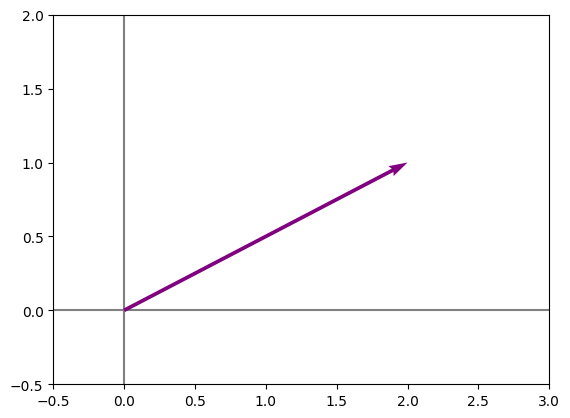

In [199]:
# graficamos el vector v
graficarVectores([v.flatten()], ['purple'])

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2);

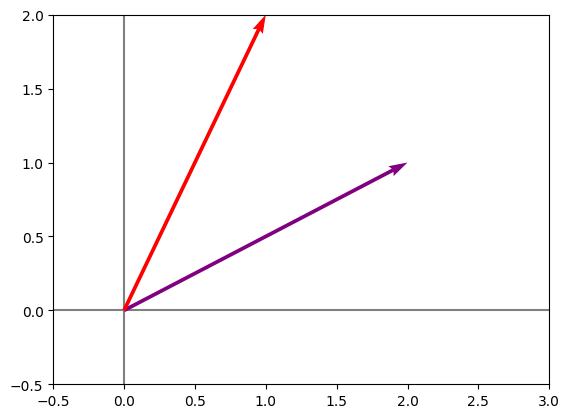

In [200]:
# para aplicar la transformación lineal, realizamos el producto punto entre la matriz y el vector
Av = A @ v
graficarVectores([v.flatten(), Av.flatten()], ['purple', 'red'])

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2);

In [201]:
# Comprobamos las normas de los vectores
print(f'''
 Norma del vector v: {np.linalg.norm(v)}
Norma del vector Av: {np.linalg.norm(Av)}
''')


 Norma del vector v: 2.23606797749979
Norma del vector Av: 2.23606797749979



## Autovalores y Autovectores

In [202]:
# creamos una matriz y un vector
X = np.array([[3, 2], [4, 1]])
v = np.array([[1], [1]])
X, v

(array([[3, 2],
        [4, 1]]),
 array([[1],
        [1]]))

In [203]:
u = X @ v
u

array([[5],
       [5]])

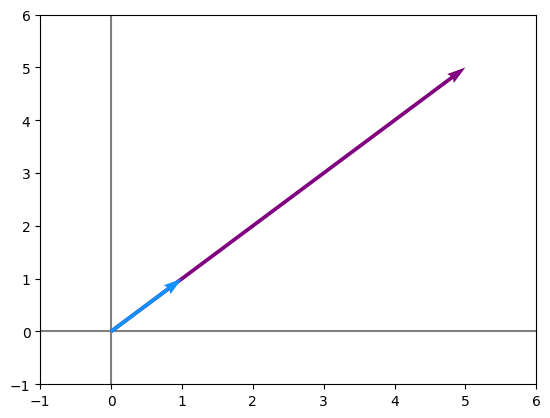

In [204]:
graficarVectores([u.flatten(), v.flatten()], ['purple', '#1190FF'])

plt.xlim(-1, 6)
plt.ylim(-1, 6);

## Cómo calcular los autovalores y autovectores

In [205]:
# calculamos los autovalores y autovectores de la matriz X
autovalores, autovectores = np.linalg.eig(X)
autovalores, autovectores

(array([ 5., -1.]),
 array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

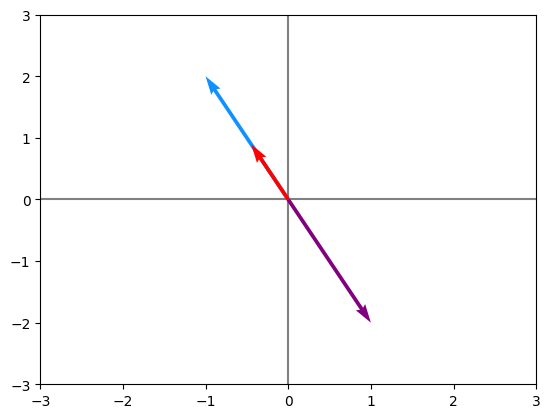

In [206]:
v = np.array([[-1], [2]])
v_np = autovectores[:, 1]

graficarVectores([(X @ v).flatten(),v.flatten(), v_np.flatten()], ['purple', '#1190FF', 'red'])

plt.xlim(-3, 3)
plt.ylim(-3, 3);

> Los autovectores son los mismos. Pueden cambiar en amplitud o sentido, pero su dirección se mantiene

## Descomposición de matrices

Consiste en reescribir una matriz cuadrada X como un producto de A x B x C, es decir X = AxBxC, 

$$
\begin{equation*}
    X = A \cdot B \cdot C = 
        \begin{bmatrix}
            a_{1,1} & a_{1,2} & \dots & a_{1,n} \\
            a_{2,1} & a_{2,2} & \dots & a_{2,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{n,1} & a_{n,2} & \dots & a_{n,n}
        \end{bmatrix}
        \cdot
        \begin{bmatrix}
            \lambda_1 & 0 & \dots & 0 \\
            0 & \lambda_2 & \dots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0 & 0 & \dots & \lambda_n
        \end{bmatrix}
        \cdot
        {\begin{bmatrix}
            a_{1,1} & a_{1,2} & \dots & a_{1,n} \\
            a_{2,1} & a_{2,2} & \dots & a_{2,n} \\
            \vdots & \vdots & \ddots & \vdots \\
            a_{n,1} & a_{n,2} & \dots & a_{n,n}
        \end{bmatrix}}^{-1}
\end{equation*}
$$

donde:

- A: es la matriz formada por los autovectores
- B: matriz diagonal formada por los autovalores
- C: matriz inversa de A.

In [207]:
# Definamos una matriz cuadrada
X = np.random.randint(1, 10, (3, 3))
# calculamos sus autovalores y autovectores
autovalores, autovectores = np.linalg.eig(X)
# creamos una matriz diagonal con los autovalores
B = np.diag(autovalores)
# verificamos que la descomposición es correcta

print(f'''
Matriz original:
{X}
Matriz de autovectores:
{autovectores}
Matriz diagonal de autovalores:
{B}
Matriz calculada:
{autovectores @ B @ np.linalg.inv(autovectores)}
    ''')


Matriz original:
[[8 3 9]
 [5 1 6]
 [9 7 9]]
Matriz de autovectores:
[[ 0.602514    0.76681525 -0.42895943]
 [ 0.37351496 -0.21226162 -0.58074741]
 [ 0.7053109  -0.60575522  0.69190046]]
Matriz diagonal de autovalores:
[[20.39530198  0.          0.        ]
 [ 0.          0.05991038  0.        ]
 [ 0.          0.         -2.45521236]]
Matriz calculada:
[[8. 3. 9.]
 [5. 1. 6.]
 [9. 7. 9.]]
    


## ¿Cómo descompongo una matriz no cuadrada (SVD)?

In [208]:
# creamos una matriz que no es cuadrada
X = np.random.randint(1, 10, (2, 3))
X

array([[3, 8, 7],
       [8, 9, 3]])

In [209]:
# Calculamos los valores singulares de la matriz
U, S, V = np.linalg.svd(X, full_matrices=False)
print(f'''
Matriz original:
{X}
Matriz U:
{U}
Matriz diagonal S:
{np.diag(S)}
Matriz V:
{V}
Matriz calculada:
{U @ np.diag(S) @ V}
    ''')


Matriz original:
[[3 8 7]
 [8 9 3]]
Matriz U:
[[-0.65746061 -0.75348891]
 [-0.75348891  0.65746061]]
Matriz diagonal S:
[[16.00277943  0.        ]
 [ 0.          4.46218001]]
Matriz V:
[[-0.49993148 -0.75243711 -0.42884369]
 [ 0.6721419  -0.02482325 -0.74000613]]
Matriz calculada:
[[3. 8. 7.]
 [8. 9. 3.]]
    


## Las tres transformaciones

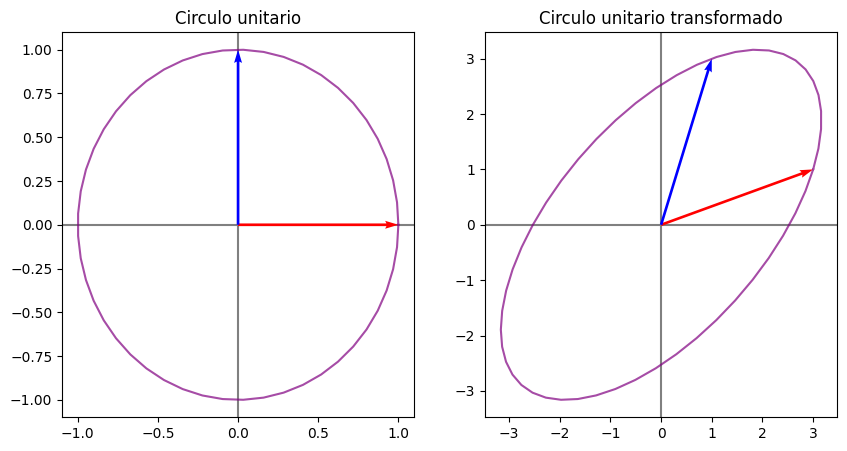

In [210]:
X = np.random.randint(-2, 4, (2, 2))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
graficarMatriz(np.eye(2))
plt.subplot(1, 2, 2)
graficarMatriz(X, titulo='Circulo unitario transformado')

## Aplicación de las matrices D y V y U y su efecto en la transformación

- V → rota el espacio
- S → Escala el espacio (agranda o encoje los vectores, también puede cambiar su sentido)
- U → rota nuevamente los vectores

> La descomposición por valores singulares tiene efectos similares

In [211]:
U, S, V = np.linalg.svd(X, full_matrices=False)

In [212]:
# recuperamos nuestras matrices
print(f'''
Matriz U:
{U}
Matriz diagonal S:
{np.diag(S)}
Matriz V:
{V}
    ''')


Matriz U:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Matriz diagonal S:
[[4. 0.]
 [0. 2.]]
Matriz V:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
    


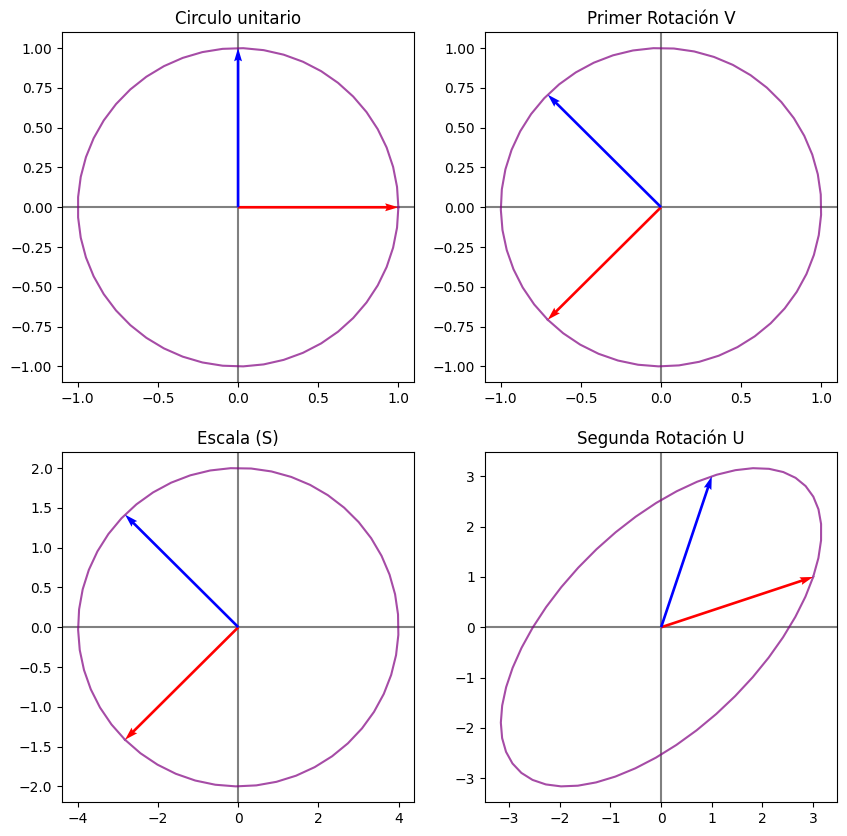

In [213]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
graficarMatriz(np.eye(2))
plt.subplot(2, 2, 2)
graficarMatriz(V, titulo='Primer Rotación V')
plt.subplot(2, 2, 3)
graficarMatriz(np.diag(S) @ V, titulo='Escala (S)')
plt.subplot(2, 2, 4)
graficarMatriz(U @ (np.diag(S) @ V), titulo='Segunda Rotación U')

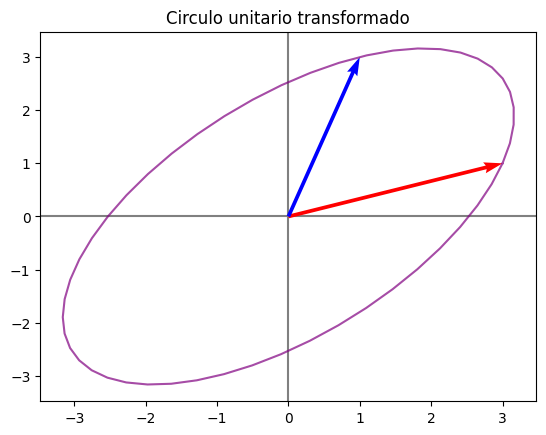

In [214]:
graficarMatriz(X, titulo='Circulo unitario transformado')

## ¿Cómo interpretar los valores singulares?

In [215]:
# recuperemos la matriz de valores singulares
S

array([4., 2.])

In [216]:
# definamos los valores de u1 y v1
u1 = [S[0]*U[0, 0], S[0]*U[0, 1]] # Aplicación de S a U en la primera fila
v1 = [S[1]*U[1, 0], S[1]*U[1, 1]] # Aplicación de S a U en la segunda fila
print(f'''
Primer fila de X antes de aplicar S:
{X[0, :]}
Primer fila de X después de aplicar S:
{u1}
Segunda fila de X antes de aplicar S:
{X[1, :]}
Segunda fila de X después de aplicar S:
{v1}
    ''')


Primer fila de X antes de aplicar S:
[3 1]
Primer fila de X después de aplicar S:
[-2.828427124746191, -2.8284271247461907]
Segunda fila de X antes de aplicar S:
[1 3]
Segunda fila de X después de aplicar S:
[-1.4142135623730945, 1.4142135623730947]
    


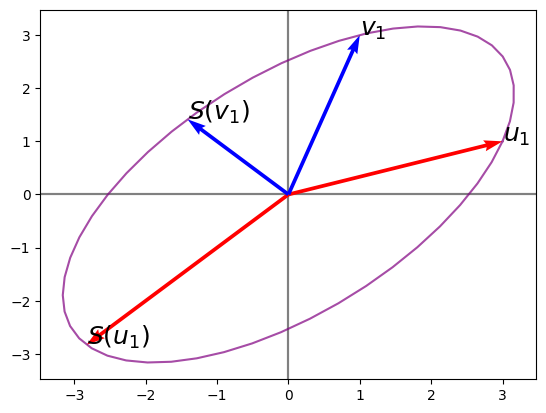

In [217]:
# grafiquemos el comportamiento de los vectores
graficarMatriz(X, titulo='')
graficarVectores([u1, v1], colores=['red', 'blue'])

# agregamos indicadores de texto para los vectores
plt.text(u1[0], u1[1], r'$S(u_1)$', fontsize=18)
plt.text(v1[0], v1[1], r'$S(v_1)$', fontsize=18)
plt.text(X[0, 0], X[0, 1], r'$u_1$', fontsize=18)
plt.text(X[1, 0], X[1, 1], r'$v_1$', fontsize=18);
